In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
%matplotlib inline

In [90]:
import geopandas as gpd
from shapely.geometry import Point
import time

In [3]:
# Notebook Styling 
# sns.set()
pd.options.display.max_columns = None
display(HTML("<style>.container { width:100% !important; }</style>"))

# Data source

Data pulled from https://data.detroitmi.gov/

In [4]:
ZIP_SHP_PATH = os.path.join('zip://', '..', 'shapefiles', 'City_of_Detroit_Boundary.zip')
detroit_boundary = gpd.read_file(ZIP_SHP_PATH)

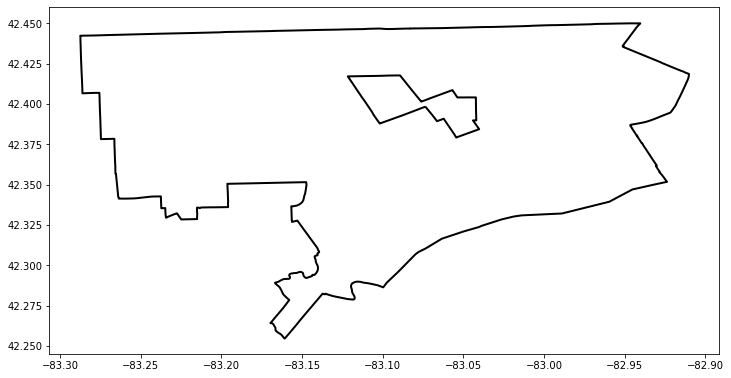

In [5]:
figsize = (12,12)
fig, ax = plt.subplots(figsize=figsize)
base = detroit_boundary.plot(figsize=figsize, color='white', edgecolor='black', linewidth=2, ax=ax)

In [6]:
ZIP_SHP_PATH = os.path.join('zip://', '..', 'shapefiles', 'DPD_Precincts.zip')
precincts = gpd.read_file(ZIP_SHP_PATH)

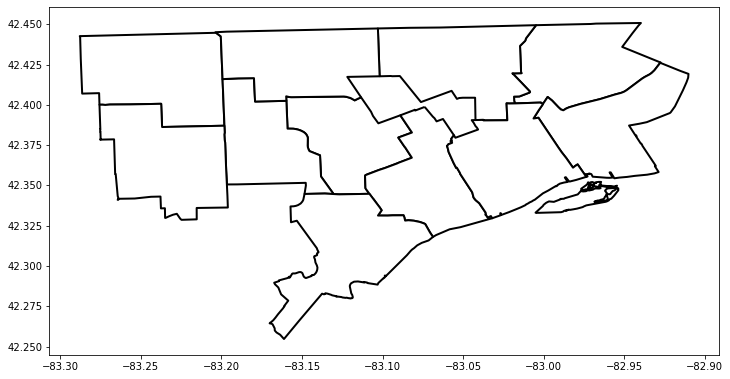

In [7]:
figsize = (12,12)
fig, ax = plt.subplots(figsize=figsize)
base = precincts.plot(figsize=figsize, color='white', edgecolor='black', linewidth=2, ax=ax)

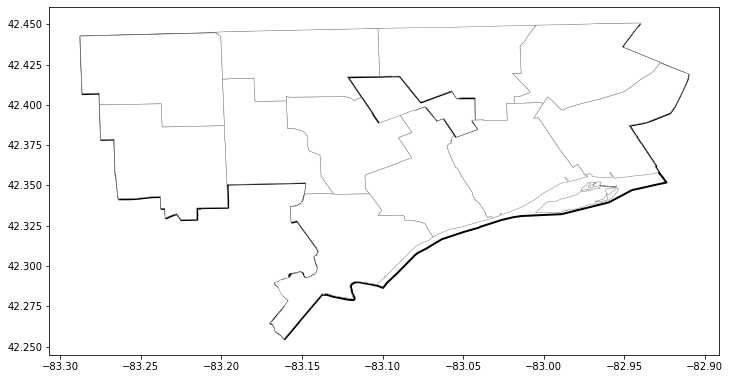

In [9]:
figsize = (12,12)
fig, ax = plt.subplots(figsize=figsize)
base = detroit_boundary.plot(figsize=figsize, color='white', edgecolor='black', linewidth=2, ax=ax)
ax = precincts.plot(figsize=figsize, color='white', edgecolor='grey', linewidth=0.5, ax=base)

In [155]:
ZIP_SHP_PATH = os.path.join('zip://', '..', 'shapefiles', 'Master_Plan_Neighborhoods.zip')
neighborhoods = gpd.read_file(ZIP_SHP_PATH)

In [167]:
neighborhoods_orig_crs = neighborhoods.crs
neighborhoods_orig_crs

{'init': 'epsg:4326'}

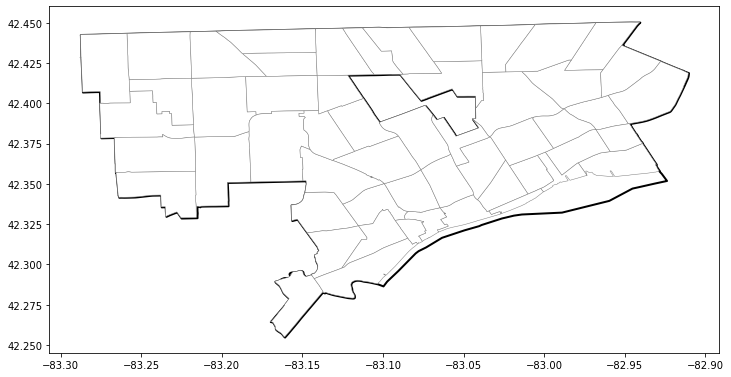

In [156]:
figsize = (12,12)
fig, ax = plt.subplots(figsize=figsize)
base = detroit_boundary.plot(figsize=figsize, color='white', edgecolor='black', linewidth=2, ax=ax)
ax = neighborhoods.plot(figsize=figsize, color='white', edgecolor='grey', linewidth=0.5, ax=base)

In [161]:
neighborhoods.head()

,OBJECTID,NHOOD,Cluster,MapNo,NeighC,MapPage,MapPage_LU,F4Color_ke,Shape__Are,Shape__Len,geometry
0,1,Airport,1,1,Neighborhood Cluster 1,Map 1-1B,Map 1-1A,0,1.292113e+08,49178.410893,"POLYGON ((-82.99228 42.39333, -82.99267 42.393..."
1,2,Bagley,10,1,Neighborhood Cluster 10,Map 10-1B,Map 10-1A,3,5.437710e+07,32646.892258,"POLYGON ((-83.14751 42.41712, -83.14814 42.417..."
2,3,Boynton,5,1,Neighborhood Cluster 5,Map 5-1B,Map 5-1A,1,6.496687e+07,39759.946468,"POLYGON ((-83.15303 42.26440, -83.15491 42.262..."
3,4,Brightmoor,8,1,Neighborhood Cluster 8,Map 8-1B,Map 8-1A,1,1.089440e+08,54589.268292,"POLYGON ((-83.21701 42.37946, -83.21696 42.379..."
4,5,Brooks,7,1,Neighborhood Cluster 7,Map 7-1B,Map 7-1A,1,1.249278e+08,51172.011857,"POLYGON ((-83.18221 42.35845, -83.18202 42.353..."


In [164]:
neighborhoods = neighborhoods[['NHOOD', 'geometry']].copy()

In [165]:
neighborhoods['geometry'].area

0     0.001313
1     0.000553
2     0.000659
3     0.001107
4     0.001268
5     0.000744
6     0.000369
7     0.000400
8     0.001248
9     0.000723
10    0.000469
11    0.001065
12    0.000546
13    0.000849
14    0.000258
15    0.000857
16    0.000661
17    0.000716
18    0.000641
19    0.001127
20    0.001046
21    0.000521
22    0.000657
23    0.000926
24    0.000978
25    0.000177
26    0.000231
27    0.000317
28    0.000547
29    0.000671
30    0.000473
31    0.000599
32    0.001433
33    0.000472
34    0.000641
35    0.000854
36    0.001058
37    0.000147
38    0.000752
39    0.000759
40    0.000767
41    0.000802
42    0.001170
43    0.000843
44    0.000704
45    0.000990
46    0.000656
47    0.000481
48    0.000458
49    0.000884
50    0.000384
51    0.000539
52    0.000868
53    0.000615
dtype: float64

## RMS Data

In [126]:
CSV_PATH = os.path.join('..', 'data_raw', 'RMS_Crime_Incidents.csv')

# det_rms_cols = ['crime_id', 'report_number', 'address', 'offense_description', 'offense_category', 
#                 'state_offense_code', 'arrest_charge', 'charge_description', 'incident_timestamp', 
#                 'scout_car_area', 'precinct', 'neighborhood', 'council_district', 'zip_code', 
#                 'longitude', 'latitude', 'oid']

# det_crimes = pd.read_csv(CSV_PATH, usecols=det_rms_cols)
det_crimes = pd.read_csv(CSV_PATH)
det_crimes.rename({'longitude':'Longitude', 'latitude':'Latitude'}, axis=1, inplace=True)

C:\Users\mattt\Anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3,8,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [127]:
det_crimes['geometry'] = det_crimes.apply(lambda x: Point(x['Longitude'], x['Latitude']), axis=1)
det_crimes = gpd.GeoDataFrame(det_crimes)

In [128]:
datetime_pattern = '%Y-%m-%dT%H:%M:%S'

det_crimes['incident_timestamp'] = pd.to_datetime(det_crimes['incident_timestamp'], format=datetime_pattern, errors='coerce')
det_crimes['incident_timestamp'] = det_crimes['incident_timestamp'].dt.tz_convert('America/Detroit')

In [129]:
det_crimes['incident_timestamp'].min()

Timestamp('1915-10-17 01:00:00-0500', tz='America/Detroit')

In [130]:
det_crimes['incident_timestamp'].max()

Timestamp('2019-11-29 20:05:00-0500', tz='America/Detroit')

C:\Users\mattt\Anaconda3\envs\geo_env\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


(0, 70)

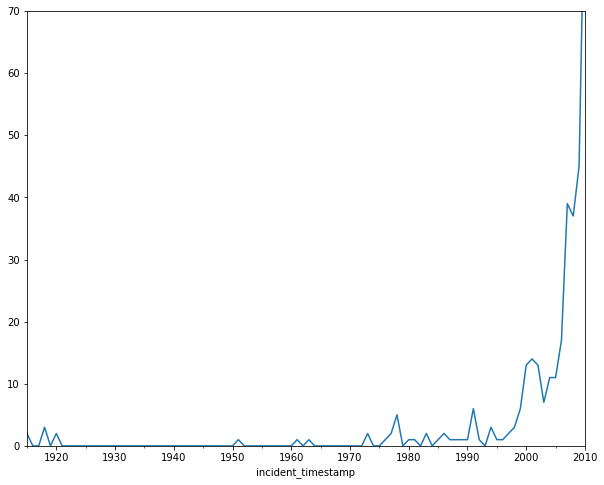

In [131]:
fig, ax = plt.subplots(figsize=(10,8))
plot_data = det_crimes.groupby(pd.Grouper(key='incident_timestamp', freq='Y')).count()['report_number']
ax = plot_data.plot(ax=ax)
ax.set_xlim([plot_data.index.min(), '2010'])
ax.set_ylim([0, 70])

(0, 400)

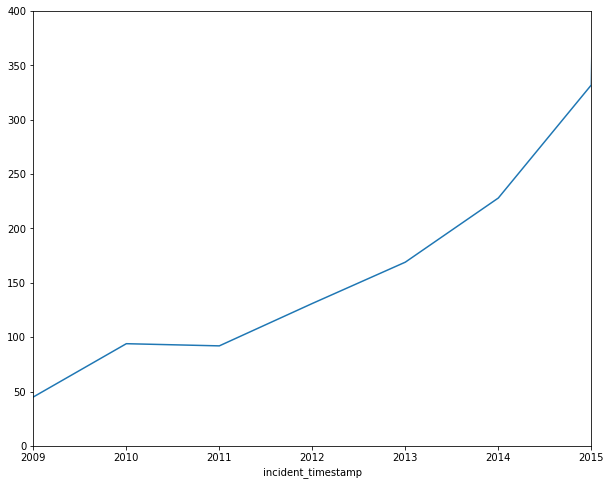

In [132]:
fig, ax = plt.subplots(figsize=(10,8))
plot_data = det_crimes.groupby(pd.Grouper(key='incident_timestamp', freq='Y')).count()['report_number']
ax = plot_data.plot(ax=ax)
ax.set_xlim(['2009', '2015'])
ax.set_ylim([0, 400])

(39, 49)

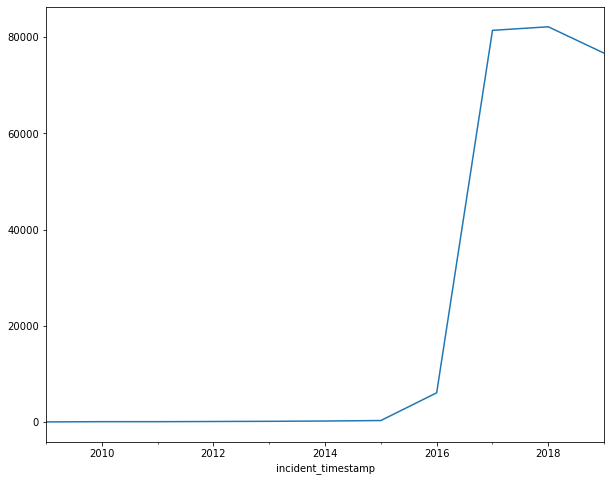

In [133]:
fig, ax = plt.subplots(figsize=(10,8))
plot_data = det_crimes.groupby(pd.Grouper(key='incident_timestamp', freq='Y')).count()['report_number']
ax = plot_data.plot(ax=ax)
ax.set_xlim(['2009', '2019'])
# ax.set_ylim([0, 400])

(561, 598)

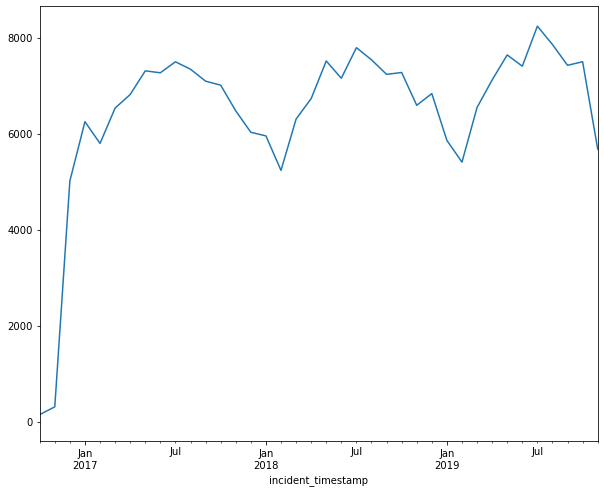

In [134]:
fig, ax = plt.subplots(figsize=(10,8))
plot_data = det_crimes.groupby(pd.Grouper(key='incident_timestamp', freq='M')).count()['report_number']
ax = plot_data.plot(ax=ax)
ax.set_xlim(['2016-10-01', '2019-11-30'])
# ax.set_ylim([0, 400])

So it looks like this dataset is pretty unreliable before the beginning of 2017. Maybe the Detroit Police Department bought a new RMS system that went into use at that time? In any event, we should examine what's going on with the data claiming to be from before Jan 1, 2017.

In [135]:
pre2017_det_crimes = det_crimes.loc[det_crimes['incident_timestamp'] < '2017-01-01'].copy()
det_crimes = det_crimes.loc[det_crimes['incident_timestamp'] >= '2017-01-01'].copy()

In [136]:
pre2017_det_crimes.sort_values(['incident_timestamp'], inplace=True)

In [137]:
query = pre2017_det_crimes['charge_description'].value_counts()
query[(query >= 50)]

FRAUD - IMPERSONATION                                   1215
BURGLARY - FORCED ENTRY                                  739
ASSAULT AND BATTERY/SIMPLE ASSAULT                       685
DAMAGE TO PROPERTY                                       650
MOTOR VEHICLE THEFT                                      527
AGGRAVATED / FELONIOUS ASSAULT                           486
LARCENY - OTHER                                          381
LARCENY - THEFT FROM BUILDING                            340
FRAUD - FALSE PRETENSE / SWINDLE / CONFIDENCE GAME       327
LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE           220
ROBBERY                                                  214
FRAUD - CREDIT CARD/AUTOMATIC TELLER MACHINE             184
LARCENY - THEFT OF MOTOR VEHICLE PARTS / ACCESSORIES     141
VIOLATION OF CONTROLED SUBSTANCE ACT - (VCSA)            120
FAMILY - ABUSE / NEGLECT NONVIOLENT                      106
CSC 1ST DEGREE - PENIS / VAGINA                           92
MISCELLANEOUS CRIMINAL O

In [138]:
query[(query >= 10) & (query < 50) ]

SEX OFFENSE - OTHER                                  39
CSC 4TH DEGREE - FORCIBLE CONTACT                    37
LARCENY FROM GROUNDS                                 35
CSC 3RD DEGREE - PENIS / VAGINA                      29
MOTOR VEHICLE AS STOLEN PROPERTY (RECOVERED ONLY)    26
FRAUD - NON SUFFICENT FUNDS CHECKS                   23
FRAUD BY WIRE                                        19
RETAIL FRAUD - THEFT                                 19
FORGERY / COUNTERFEITING                             15
KIDNAPPING / ABDUCTION                               14
TRESPASS                                             13
WEAPONS OFFENSE - OTHER                              13
CSC 3RD DEGREE - ORAL / ANAL                         13
FAMILY - OTHER                                       12
OBSTRUCTING JUSTICE                                  11
DISORDERLY CONDUCT - GENERAL                         10
CSC 1ST DEGREE - OBJECT                              10
LARCENY - POCKETPICKING                         

In [139]:
query[(query >= 1) & (query < 10) ]

LIQUOR VIOLATIONS - OTHER                                       9
RUNAWAY                                                         9
MURDER / NON-NEGLIGENT MANSLAUGHTER (VOLUNTARY)                 8
STOLEN PROPERTY                                                 8
MARIJUANA -POSSESS                                              6
ENTRY WITHOUT PERMISSION (NO INTENT)                            4
IDENITY THEFT                                                   4
SEXUAL PENETRATION NONFORCIBLE - BLOOD / AFFINITY               4
LARCENY - PURSE SNATCHING                                       4
LARCENY OF GASOLINE - SELF SERVICE STATION                      4
OBSTRUCTING POLICE                                              4
EXTORTION                                                       3
HARASSING COMMUNICATIONS                                        2
INVASION OF PRIVACY - OTHER                                     2
SEXUAL PENETRATION NONFORCIBLE - OTHER                          2
FRAUD - WE

In [141]:
pre2017_det_crimes.head()

,X,Y,crime_id,report_number,address,offense_description,offense_category,state_offense_code,arrest_charge,charge_description,incident_timestamp,incident_time,day_of_week,hour_of_day,year,scout_car_area,precinct,block_id,neighborhood,council_district,zip_code,Longitude,Latitude,oid,geometry
47372,-83.192336,42.350980,3424129,1910160299,Tireman Ave & Payne Ave,DAMAGE TO PROPERTY,DAMAGE TO PROPERTY,2900,29000,DAMAGE TO PROPERTY,1915-10-17 01:00:00-05:00,01:00,7,1,1915,0207,02,261635355001008,Fiskhorn,7,48228,-83.192336,42.350980,2266944,POINT (-83.19234 42.35098)
36200,-82.962458,42.410459,3025410,1702140397,Elmdale St & Manistique St,FRAUD - FALSE PRETENSE / SWINDLE / CONFIDENCE ...,FRAUD,2601,26001,FRAUD - FALSE PRETENSE / SWINDLE / CONFIDENCE ...,1915-11-04 17:00:00-05:00,17:00,4,17,1915,0911,09,261635011004012,Outer Drive-Hayes,4,48224,-82.962458,42.410459,2255772,POINT (-82.96246 42.41046)
214332,-83.081128,42.353878,3392536,1908020284,Merrick St & Commonwealth St,LARCENY - THEFT OF MOTOR VEHICLE PARTS / ACCES...,LARCENY,2306,23006,LARCENY - THEFT OF MOTOR VEHICLE PARTS / ACCES...,1918-08-01 21:00:00-05:00,22:00,4,22,1918,305,3,261635219003002,Woodbridge,6,48208,-83.081128,42.353878,2433904,POINT (-83.08113 42.35388)
86078,-83.210857,42.412091,3332671,1903130210,Verne St & Biltmore St,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,LARCENY,2305,23005,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,1918-09-09 22:00:00-05:00,23:00,1,23,1918,0812,08,261635421004003,Crary/St Marys,1,48235,-83.210857,42.412091,2305650,POINT (-83.21086 42.41209)
47607,-83.079804,42.412987,3436177,1911150323,Victor St & Dequindre St,DAMAGE TO PROPERTY,DAMAGE TO PROPERTY,2900,29000,DAMAGE TO PROPERTY,1918-11-09 05:00:00-05:00,05:00,6,5,1918,1110,11,261635104002025,North Campau,3,48203,-83.079804,42.412987,2267179,POINT (-83.07980 42.41299)


In [152]:
pre2017_det_crimes.shape

(7401, 25)

In [151]:
pre2017_det_crimes.loc[(pre2017_det_crimes['incident_timestamp'].dt.year == pre2017_det_crimes['year'])].shape

(7401, 25)

Ok, so the 'year' column matches the incident timestamp for every event labeled as pre-2017. That means the data coming from the data portal this way. Whether this data is accurate or not, I can't tell, so I'm just going to focus the analysis on the period without suspect data, from 2017 to now.

# 911 Calls for Service Data

In [177]:
CSV_PATH = os.path.join('..', 'data_raw', '911_Calls_For_Service.csv')

det_911s = pd.read_csv(CSV_PATH)
det_911s.rename({'longitude':'Longitude', 'latitude':'Latitude'}, axis=1, inplace=True)

In [178]:
det_911s.head(2)

,X,Y,incident_id,agency,incident_address,zip_code,priority,callcode,calldescription,category,call_timestamp,precinct_sca,respondingunit,officerinitiated,intaketime,dispatchtime,traveltime,totalresponsetime,time_on_scene,totaltime,neighborhood,block_id,council_district,Longitude,Latitude,oid
0,-83.197290,42.365373,201626502993,DPD,W Chicago St & Greenfield Rd,48227,2,843020,UNKNOWN PROBLEM,UNKPROB,2016-09-22T00:22:20.000Z,0207,,No,1.4,20.6,8.5,31.9,23.0,54.9,We Care Community,2.616354e+14,7.0,-83.197290,42.365373,32041921
1,-83.062263,42.353715,201626502997,DPD,Woodward Ave & Garfield St,48201,3,843030,INVESTIGATE PERSON,INVPERS,2016-09-22T00:24:34.000Z,39A,NaN,No,1.1,0.6,0,2.1,1.7,3.8,Midtown,2.616352e+14,6.0,-83.062263,42.353715,32041922


In [199]:
datetime_pattern = '%Y-%m-%dT%H:%M:%S'

det_911s['call_timestamp'] = pd.to_datetime(det_911s['call_timestamp'], format=datetime_pattern, errors='coerce')
det_911s['call_timestamp'] = det_911s['call_timestamp'].dt.tz_convert('America/Detroit')

In [200]:
det_911s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232000 entries, 0 to 2231999
Data columns (total 26 columns):
X                    float64
Y                    float64
incident_id          int64
agency               object
incident_address     object
zip_code             object
priority             object
callcode             object
calldescription      object
category             object
call_timestamp       datetime64[ns, America/Detroit]
precinct_sca         object
respondingunit       object
officerinitiated     object
intaketime           object
dispatchtime         object
traveltime           object
totalresponsetime    object
time_on_scene        object
totaltime            object
neighborhood         object
block_id             float64
council_district     float64
Longitude            float64
Latitude             float64
oid                  int64
dtypes: datetime64[ns, America/Detroit](1), float64(6), int64(2), object(17)
memory usage: 442.7+ MB


In [196]:
cols = list(det_911s.columns)
nulls = []
nuniq = []

for col in cols:
    num_null = det_911s[col].isnull().sum()
    num_uniq = det_911s[col].nunique()
    print(f"Feature name: {col:>17} ::: null rows: {num_null:>8} ::: unique values: {num_uniq:>8}")
    nulls.append(num_null)
    nuniq.append(num_uniq)

Feature name:                 X ::: null rows:        0 ::: unique values:    21049
Feature name:                 Y ::: null rows:        0 ::: unique values:    21048
Feature name:       incident_id ::: null rows:        0 ::: unique values:  2232000
Feature name:            agency ::: null rows:        0 ::: unique values:        2
Feature name:  incident_address ::: null rows:    87886 ::: unique values:    20024
Feature name:          zip_code ::: null rows:        0 ::: unique values:       66
Feature name:          priority ::: null rows:        0 ::: unique values:        9
Feature name:          callcode ::: null rows:        0 ::: unique values:      334
Feature name:   calldescription ::: null rows:        0 ::: unique values:      257
Feature name:          category ::: null rows:        0 ::: unique values:      235
Feature name:    call_timestamp ::: null rows:        0 ::: unique values:  2199201
Feature name:      precinct_sca ::: null rows:        0 ::: unique values:  

In [197]:
det_911s_info = pd.DataFrame({'feature':cols, 'null_values':nulls, 'unique_values':nuniq})
det_911s_info.sort_values('null_values', inplace=True, ascending=False)
det_911s_info

,feature,null_values,unique_values
12,respondingunit,1138086,224040
18,time_on_scene,238235,7788
17,totalresponsetime,211858,11433
16,traveltime,211858,3207
19,totaltime,202469,9670
15,dispatchtime,180331,11928
20,neighborhood,123357,207
22,council_district,116706,7
21,block_id,87937,18586
4,incident_address,87886,20024


In [201]:
det_911s.head(2)

,X,Y,incident_id,agency,incident_address,zip_code,priority,callcode,calldescription,category,call_timestamp,precinct_sca,respondingunit,officerinitiated,intaketime,dispatchtime,traveltime,totalresponsetime,time_on_scene,totaltime,neighborhood,block_id,council_district,Longitude,Latitude,oid
0,-83.197290,42.365373,201626502993,DPD,W Chicago St & Greenfield Rd,48227,2,843020,UNKNOWN PROBLEM,UNKPROB,2016-09-21 20:22:20-04:00,0207,,No,1.4,20.6,8.5,31.9,23.0,54.9,We Care Community,2.616354e+14,7.0,-83.197290,42.365373,32041921
1,-83.062263,42.353715,201626502997,DPD,Woodward Ave & Garfield St,48201,3,843030,INVESTIGATE PERSON,INVPERS,2016-09-21 20:24:34-04:00,39A,NaN,No,1.1,0.6,0,2.1,1.7,3.8,Midtown,2.616352e+14,6.0,-83.062263,42.353715,32041922


In [ ]:
det_911s

In [183]:
query = det_911s['calldescription'].value_counts()
query[(query >= 20000)]

SPECIAL ATTENTION                 310732
TRAFFIC STOP                      309648
DISTURBANCE                       160259
START OF SHIFT INFORMATION        112090
REMARKS                           109474
INVESTIGATE PERSON                 90381
UNKNOWN PROBLEM                    81843
ASSAULT AND BATTERY                71078
TOWING DETAIL                      65931
HANGUP CALLS                       43203
FELONIOUS ASSAULT IP               43043
LARCENY REPORT                     35414
BUS BOARDING                       32722
AUTO X UNK INJ / IMPAIRED          31545
VERIFIED ALR / PERSON W/O CODE     24714
PERSON WITH WEAPON                 23998
UDAA REPORT                        23859
BURGLARY OCCUPIED RESD I/P         22028
SHOTS FIRED IP                     21613
Name: calldescription, dtype: int64

In [184]:
query[(query >= 10000) & (query < 20000)]

ONE DOWN OR OVER THE WHEEL      19461
INVESTIGATE AUTO                19074
MALICIOUS DESTRUCTION I/P       16695
MISCELLANEOUS TRAFFIC           16440
BUILDING CHECK                  15457
AUTO X OR PED X - INJURIES      15434
FRAUD REPORT                    15376
PANIC / DURESS ALARM            14765
THREATS REPORT                  14299
LARCENY I/P OR J/H              14059
VICIOUS ANIMAL                  13758
RECOVER AUTO                    13115
AUTO X HIT& RUN UNK INJURIES    12736
MENTAL VIOLENT NOT ARMED        12720
HOLD UP ALARM AND MOW           12663
DV A/B I/P-J/H                  12657
MALICIOUS DESTRUCTION RPT       12267
INFORMATION/NON-CRIMINAL RPT    11732
PARKING COMPLAINT               11003
WELL BEING CHECK                10546
BURGLARY OTHER                  10492
Name: calldescription, dtype: int64

In [168]:
det_crimes['offense_category'].value_counts()

ASSAULT                   42775
LARCENY                   38452
DAMAGE TO PROPERTY        29020
AGGRAVATED ASSAULT        23800
BURGLARY                  22470
STOLEN VEHICLE            20089
FRAUD                     18639
ROBBERY                    6886
DANGEROUS DRUGS            6746
WEAPONS OFFENSES           4984
SEX OFFENSES               4170
OBSTRUCTING JUDICIARY      3238
ARSON                      2397
OUIL                       2262
SEXUAL ASSAULT             2206
FAMILY OFFENSE             1997
MISCELLANEOUS              1757
STOLEN PROPERTY            1708
RUNAWAY                    1189
DISORDERLY CONDUCT         1032
OBSTRUCTING THE POLICE      977
FORGERY                     802
OTHER                       764
HOMICIDE                    749
KIDNAPPING                  571
LIQUOR                      330
EXTORTION                   123
JUSTIFIABLE HOMICIDE         37
SOLICITATION                 22
GAMBLING                      6
Name: offense_category, dtype: int64

In [169]:
det_crimes['offense_description'].value_counts()

ASSAULT AND BATTERY/SIMPLE ASSAULT    44406
AGGRAVATED / FELONIOUS ASSAULT        26027
DAMAGE TO PROPERTY                    24271
MOTOR VEHICLE THEFT                   19578
BURGLARY - FORCED ENTRY               19219
                                      ...  
TOBACCO - POSSESSION BY MINOR             1
GAMBLING - EQUIPMENT VIOLATIONS           1
PEEPING TOM                               1
INDECENT EXPOSURE                         1
HEROIN - POSSESS                          1
Name: offense_description, Length: 125, dtype: int64

In [170]:
det_crimes.head(2)

,X,Y,crime_id,report_number,address,offense_description,offense_category,state_offense_code,arrest_charge,charge_description,incident_timestamp,incident_time,day_of_week,hour_of_day,year,scout_car_area,precinct,block_id,neighborhood,council_district,zip_code,Longitude,Latitude,oid,geometry
0,-83.162276,42.412111,3203146,1804250110,Ilene St & Florence St,CSC 2ND DEGREE - FORCIBLE CONTACT,SEX OFFENSES,1177,11007,CSC 2ND DEGREE - FORCIBLE CONTACT,2018-04-25 14:21:00-04:00,14:21,3,14,2018,1210,12,261635362002020,Fitzgerald/Marygrove,2,48221,-83.162276,42.412111,2220572,POINT (-83.16228 42.41211)
1,-83.214846,42.382095,3205157,1804300130,Glendale St & Longacre St,CSC 2ND DEGREE - FORCIBLE CONTACT,SEX OFFENSES,1177,11007,CSC 2ND DEGREE - FORCIBLE CONTACT,2018-04-27 04:00:00-04:00,04:00,5,4,2018,0605,06,261635426002014,Schoolcraft Southfield,1,48227,-83.214846,42.382095,2220573,POINT (-83.21485 42.38210)


In [171]:
det_crimes['arrest_charge'].isnull().sum()

0

In [173]:
det_crimes['arrest_charge'].value_counts()

13001    23631
24001    18084
13002    18006
13001    16628
29000    16368
         ...  
38005        1
22055        1
22044        1
23010        1
22033        1
Name: arrest_charge, Length: 211, dtype: int64

In [172]:
min_date = det_crimes['incident_timestamp'].min()
min_date.strftime('%m-%d-%Y')

'01-01-2017'

In [77]:
det_crimes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 247599 entries, 0 to 247598
Data columns (total 18 columns):
crime_id               247599 non-null int64
report_number          247599 non-null object
address                247599 non-null object
offense_description    247599 non-null object
offense_category       247599 non-null object
state_offense_code     247599 non-null int64
arrest_charge          247599 non-null object
charge_description     247599 non-null object
incident_timestamp     247599 non-null object
scout_car_area         247599 non-null object
precinct               247599 non-null object
neighborhood           247599 non-null object
council_district       247599 non-null int64
zip_code               247599 non-null int64
Longitude              247599 non-null float64
Latitude               247599 non-null float64
oid                    247599 non-null int64
geometry               247599 non-null geometry
dtypes: float64(2), geometry(1), int64(5), object(10)


In [ ]:
def arrest_plot(crime_descr, crime_df=chi_crimes, crime_col='Description', start_date='2005-01-01', 
                end_date='today', frequency='Year', arrest=True, figsize=(14,6), more_label='', plot_Laquan=False):
    lable_descr = crime_descr.title()
    
    if isinstance(crime_descr, list):
        df = crime_df.loc[(chi_crimes[crime_col].isin(crime_descr)) & (chi_crimes['Date'] >= start_date) & 
                          (chi_crimes['Date'] <= end_date)]
    else:
        df = crime_df.loc[(chi_crimes[crime_col] == crime_descr) & (chi_crimes['Date'] >= start_date) & 
                          (chi_crimes['Date'] <= end_date)]
    
    fig, ax = plt.subplots(sharex=True, figsize=figsize)
    count_df = df.groupby([pd.Grouper(key='Date', freq=freq_selector(frequency))]).count()['Case Number']
    count_df.plot(ax=ax, kind='line', legend=None, label=f"{lable_descr} Cases", color='#0570b0')
    arr_count_df = df.loc[df['Arrest'] == True].groupby([pd.Grouper(key='Date', freq=freq_selector(frequency))]).count()['Case Number']
    arr_count_df.plot(ax=ax, kind='line', legend=None, label=f"{lable_descr} Cases w/ Arrest", color='#41ae76')
    
    ax.set_ylabel(f"{lable_descr} Cases \n(per {frequency})", fontsize=18)
    ax.set_title(f"{more_label}{lable_descr} Cases per {frequency} from {start_date} to {end_date}", fontsize=18)
    ax.set_xlabel('Date', fontsize=18)
    
    ax.set_ylim([0, 1.1 * max([count_df.max(), arr_count_df.max()])])
    if plot_Laquan:
        if freq_selector(frequency) == 'Y':
            ax.axvline(x='2015-04-15', label='Laquan McDonald becomes major News', linestyle='--', color='#b30000')
#             ax.axvline(x='2015', label='Laquan McDonald Shooting', linestyle='--', color='#ef6548')
        else:
            ax.axvline(x='2014-11-01', label='Laquan McDonald Shooting', linestyle='--', color='#ef6548')
            ax.axvline(x='2015-04-15', label='Laquan McDonald becomes major News', linestyle='--', color='#b30000')
    ax.legend()    

In [ ]:
crime_descr 
crime_df=det_crimes
crime_col='offense_category'
start_date='2017-01-01'
end_date='2019-11-30'
frequency='Year'
arrest=True
figsize=(14,6)
more_label=''

lable_descr = crime_descr.title()


if isinstance(crime_descr, list):
    df = crime_df.loc[(chi_crimes[crime_col].isin(crime_descr)) & (chi_crimes['incident_timestamp'] >= start_date) & 
                      (chi_crimes['incident_timestamp'] <= end_date)]
else:
    df = crime_df.loc[(chi_crimes[crime_col] == crime_descr) & (chi_crimes['incident_timestamp'] >= start_date) & 
                      (chi_crimes['incident_timestamp'] <= end_date)]

fig, ax = plt.subplots(sharex=True, figsize=figsize)
count_df = df.groupby([pd.Grouper(key='Date', freq=freq_selector(frequency))]).count()['report_number']

count_df.plot(ax=ax, kind='line', legend=None, label=f"{lable_descr} Cases", color='#0570b0')
arr_count_df = df.loc[df['Arrest'] == True].groupby([pd.Grouper(key='Date', freq=freq_selector(frequency))]).count()['Case Number']
arr_count_df.plot(ax=ax, kind='line', legend=None, label=f"{lable_descr} Cases w/ Arrest", color='#41ae76')

ax.set_ylabel(f"{lable_descr} Cases \n(per {frequency})", fontsize=18)
ax.set_title(f"{more_label}{lable_descr} Cases per {frequency} from {start_date} to {end_date}", fontsize=18)
ax.set_xlabel('Date', fontsize=18)

ax.set_ylim([0, 1.1 * max([count_df.max(), arr_count_df.max()])])
ax.legend()    

Text(0.5, 1, 'Homicides in Detroit from 1915-10-17 01:00:00-05:00 to 2019-11-29')

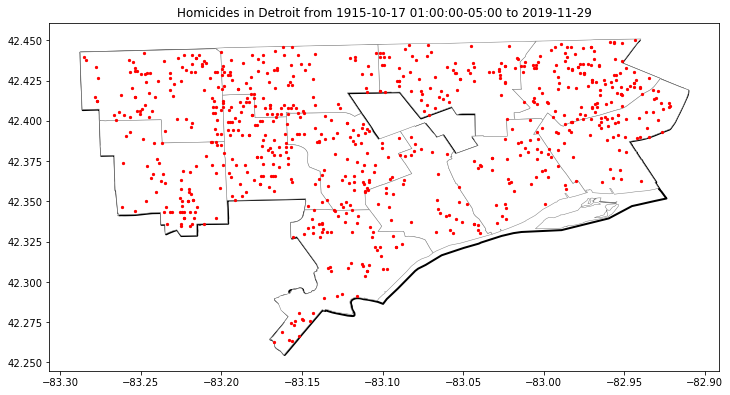

In [87]:
min_date = det_crimes['incident_timestamp'].min()
plot_df = det_crimes.loc[(det_crimes['offense_category'] == 'HOMICIDE') & (det_crimes['incident_timestamp'] >= min_date)]


figsize = (12,12)
fig, ax = plt.subplots(figsize=figsize)
base = detroit_boundary.plot(figsize=figsize, color='white', edgecolor='black', linewidth=2, ax=ax)
ax = precincts.plot(figsize=figsize, color='white', edgecolor='grey', linewidth=0.5, ax=base)
ax = plot_df.plot(marker='o', color='red', markersize=5, ax=ax)
ax.set_title(f"Homicides in Detroit from {min_date} to {det_crimes['incident_timestamp'].dt.date.max()}")